In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.stattools import adfuller, kpss


In [2]:
rcParams['figure.figsize'] = 20, 8
rcParams['lines.linewidth'] = 1
####################################################################################################
df = pd.read_csv('TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv', index_col='DATE', parse_dates=True)
####################################################################################################
df

,TEMPERATURE
DATE,
1987-01-01 12:00:00,14.696689
1987-01-02 12:00:00,14.670896
1987-01-03 12:00:00,14.636758
1987-01-04 12:00:00,14.561996
1987-01-05 12:00:00,14.448793
...,...
2019-12-27 12:00:00,16.640701
2019-12-28 12:00:00,16.531431
2019-12-29 12:00:00,16.363058


In [3]:
#fy_dt = df.groupby('Y').mean()
fy_dt = df.groupby(pd.Grouper(freq='M')).mean()

In [4]:
print(fy_dt)

            TEMPERATURE
DATE                   
1987-01-31    13.864359
1987-02-28    13.179310
1987-03-31    12.894019
1987-04-30    14.141104
1987-05-31    16.465520
...                 ...
2019-08-31    27.158361
2019-09-30    25.771573
2019-10-31    23.038315
2019-11-30    20.038626
2019-12-31    17.355959

[396 rows x 1 columns]


In [5]:
#df['396'] = fy_dt.rolling(window=12).mean()


In [6]:
#df['396']

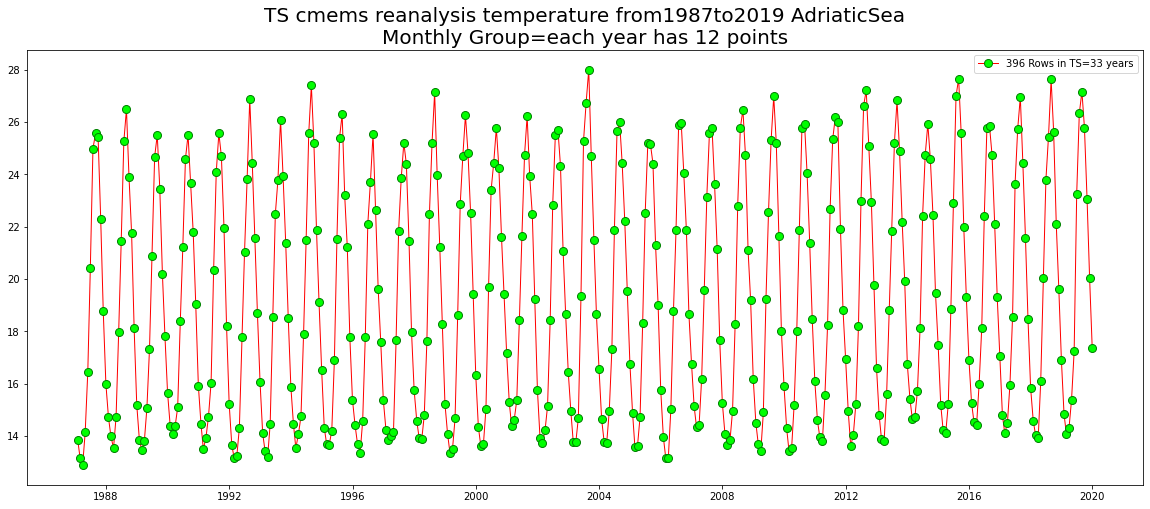

In [7]:
plt.title('TS cmems reanalysis temperature from1987to2019 AdriaticSea\nMonthly Group=each year has 12 points', size=20)
####################################################################################################
plt.plot(fy_dt, color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='396 Rows in TS=33 years')
####################################################################################################
plt.legend();

In [8]:
#new_df_add = pd.concat([df,fy_dt], axis=1)
#new_df_add.columns = ['TS-[C]','TS-MONTHLY MEAN']
#new_df_add.head()

In [9]:
#rolling for 12 months

dff = fy_dt.rolling(window = 12).mean()


In [10]:
dff


,TEMPERATURE
DATE,
1987-01-31,NaN
1987-02-28,NaN
1987-03-31,NaN
1987-04-30,NaN
1987-05-31,NaN
...,...
2019-08-31,19.735912
2019-09-30,19.748671
2019-10-31,19.827934


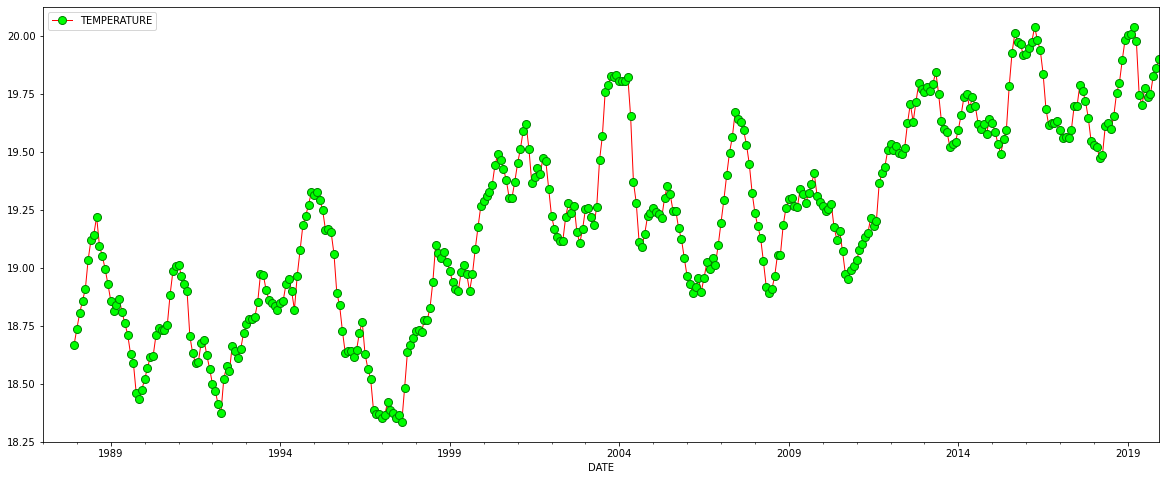

In [11]:
dff.plot(color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Monthly Rolling\nwindow size=12')
plt.legend();


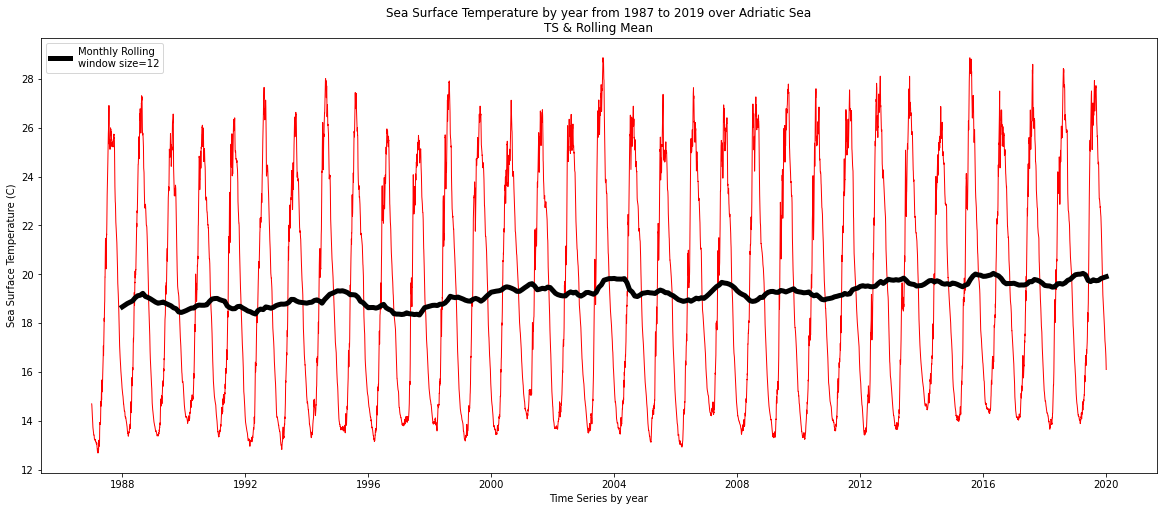

In [12]:
plt.plot(df,color='r',linewidth=1)
plt.plot(dff, color='k',label='Monthly Rolling\nwindow size=12', linewidth=5)
plt.legend();

plt.xlabel('Time Series by year')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Sea Surface Temperature by year from 1987 to 2019 over Adriatic Sea\nTS & Rolling Mean');

In [13]:

#dff.ndim
#dff.size
dff.shape

(396, 1)

In [14]:
#new_df_add = pd.concat([df,fy_dt,dff], axis=1)
#new_df_add.columns = ['TS','TS_MM','TS_Rolling_MM']
#new_df_add.head()

In [15]:
#new_df_add.to_csv("TS_CCC_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv", index=True, header=True)

In [16]:
new_df_add = pd.concat([fy_dt,dff], axis=1)
new_df_add.columns = ['TS_MM','TS_Rolling_MM']
new_df_add.head()

,TS_MM,TS_Rolling_MM
DATE,,
1987-01-31,13.864359,NaN
1987-02-28,13.179310,NaN
1987-03-31,12.894019,NaN
1987-04-30,14.141104,NaN
1987-05-31,16.465520,NaN


In [18]:
new_df_add.to_csv("TS_meann_rolling_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.csv", index=True, header=True)